In [71]:
# pip install Omnipath scanpy anndata decoupler Omnipath 

In [2]:
import numpy as np
import pandas as pd
import scipy
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

In [5]:
# restore my state: (loads hello var)
import dill
dill.load_session('state.db')

In [6]:
adata= ad.read_h5ad('/kaggle/input/scanpy2/outs/adata.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 53513 × 23081
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Indication_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

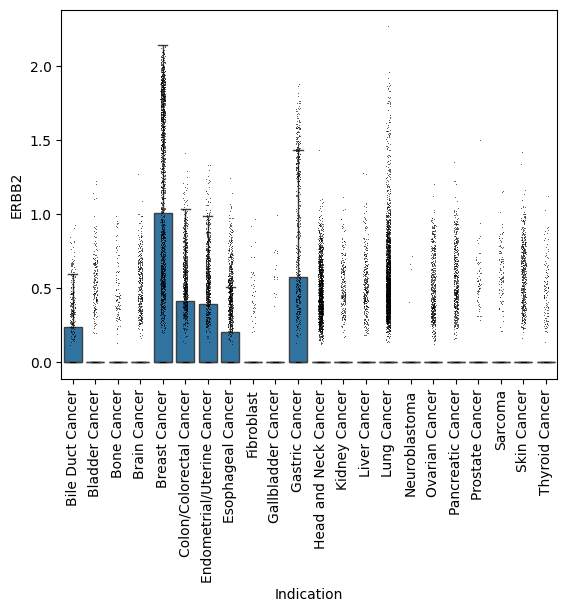

In [9]:
df = sc.get.obs_df(adata, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='Indication', y='ERBB2', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)
plt.show()

### it obvious that ERBB2 is highest in breast, gastric because trastuzumab is already FDA-approved for these two indication 
### other cancer indication express high level of ERBB2 like lung cancer 
### maybe due to the intra-tumoral heterogeinity mentioned in the paper 

### all lung cacner cell line will be tested for recurrent heterogenity program or intra tumoral heterogenity

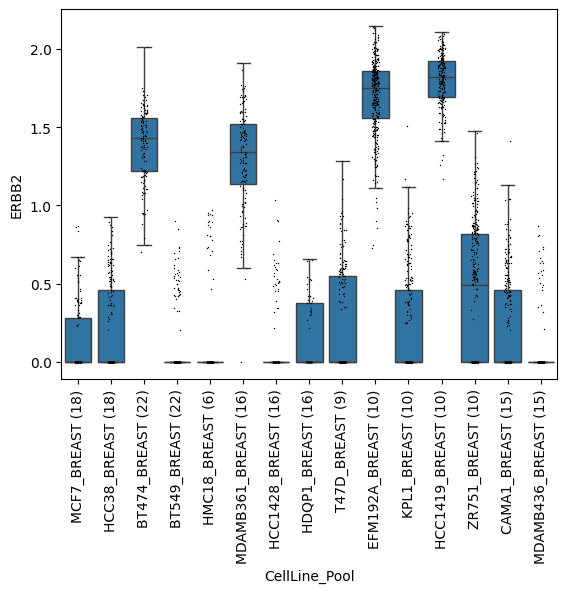

In [72]:
adata_breast = adata[adata.obs.Indication=='Breast Cancer'].copy()
df = sc.get.obs_df(adata_breast, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_breast.obs['CellLine']
df['Pool']=adata_breast.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

### from the plot it noticed that cell lines differ in expression of ERBB2, we can't determind the potential use trastuzumab untill we see why the cell lines differ in expression of this gene
### the pool doesn't affect the expression of ERBB2

# exploration of lung cancer


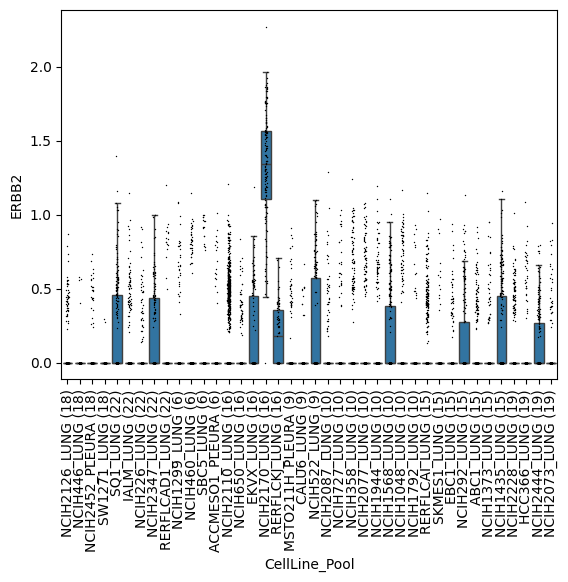

In [73]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
df['Pool']=adata_lung.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

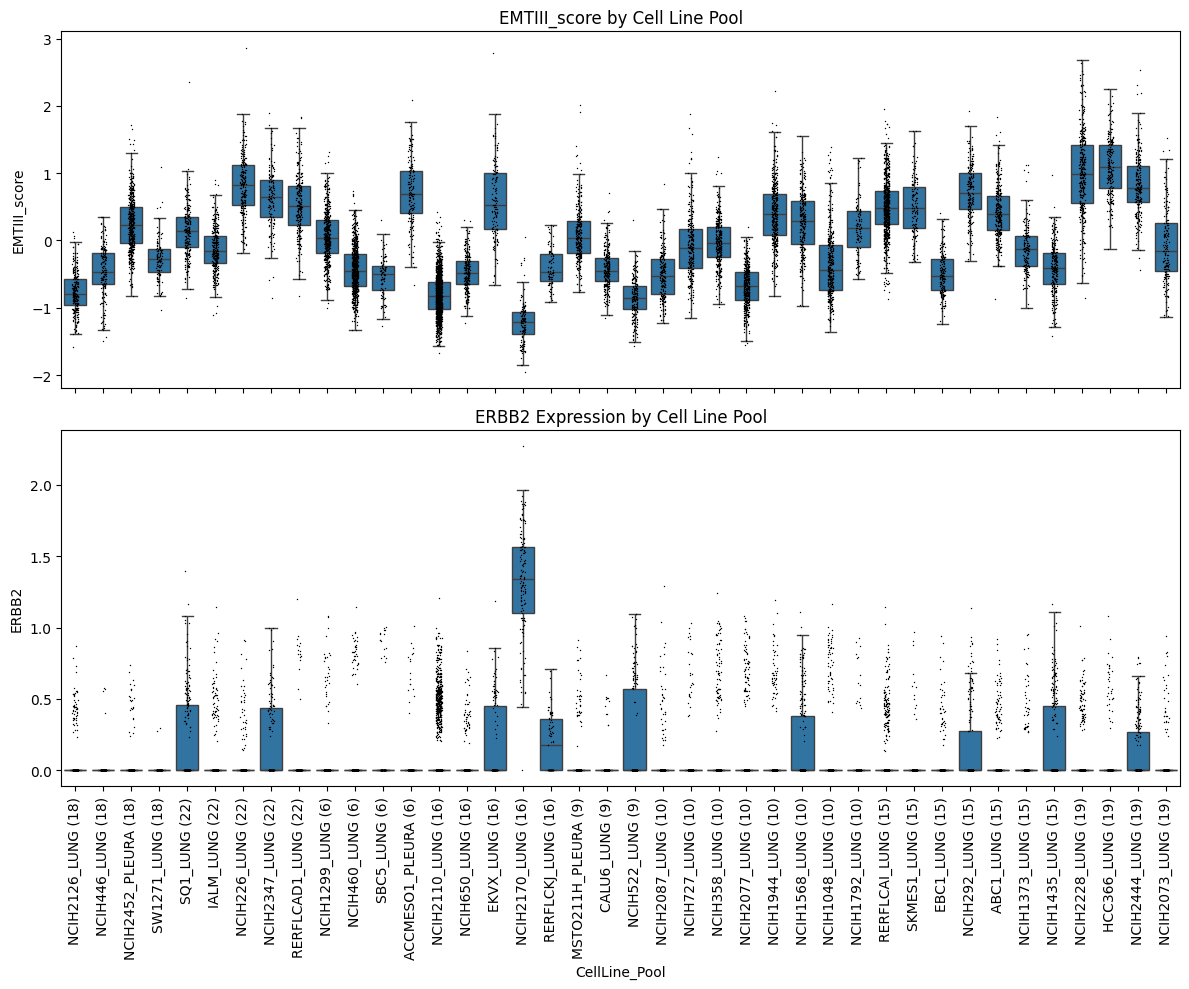

In [75]:

df['EMTII_score'] = adata_lung.obs['EMTII_score']
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
sns.boxplot(data=df, x='CellLine_Pool', y='EMTII_score', showfliers=False, ax=axes[0])
sns.stripplot(data=df, x='CellLine_Pool', y='EMTII_score', color='black', size=1, jitter=True, ax=axes[0])
axes[0].set_title('EMTII_score by Cell Line Pool')
axes[0].tick_params(axis='x', rotation=90)
sns.boxplot(data=df, x='CellLine_Pool', y='ERBB2', showfliers=False, ax=axes[1])
sns.stripplot(data=df, x='CellLine_Pool', y='ERBB2', color='black', size=1, jitter=True, ax=axes[1])
axes[1].set_title('ERBB2 Expression by Cell Line Pool')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

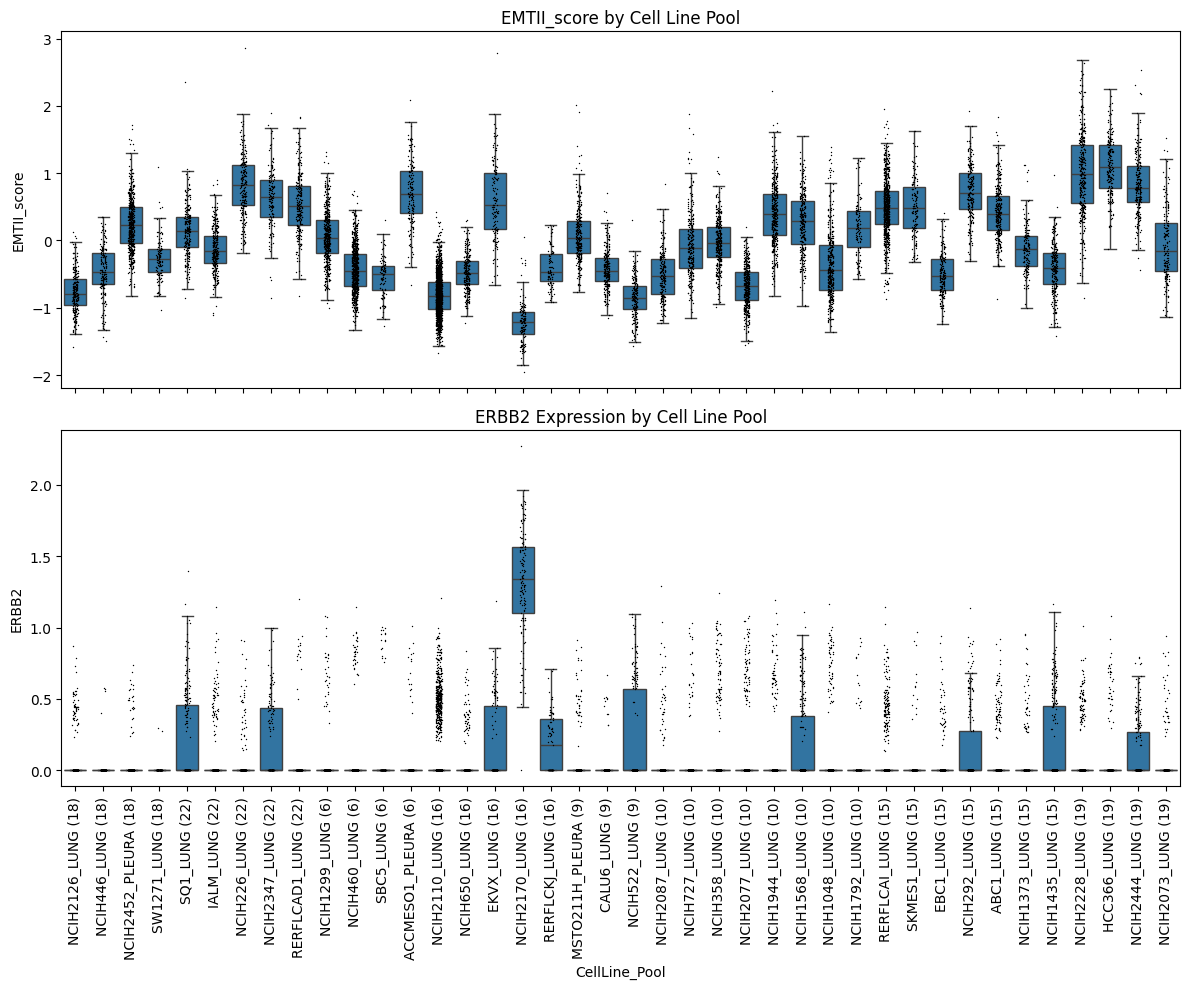

In [76]:

df['EMTII_score'] = adata_lung.obs['EMTII_score']
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
sns.boxplot(data=df, x='CellLine_Pool', y='EMTII_score', showfliers=False, ax=axes[0])
sns.stripplot(data=df, x='CellLine_Pool', y='EMTII_score', color='black', size=1, jitter=True, ax=axes[0])
axes[0].set_title('EMTII_score by Cell Line Pool')
axes[0].tick_params(axis='x', rotation=90)
sns.boxplot(data=df, x='CellLine_Pool', y='ERBB2', showfliers=False, ax=axes[1])
sns.stripplot(data=df, x='CellLine_Pool', y='ERBB2', color='black', size=1, jitter=True, ax=axes[1])
axes[1].set_title('ERBB2 Expression by Cell Line Pool')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### it looks like the expression of ERBB2 is reversely aligned with RHP EMTlll_score and EMTll_score in NCI-H2170 cell line 
### the in vitro RHP EMTII and EMTIII are highly similary with in vivo RHP as kinker et al. mentioned, so the trastumuzab could be a could candidate for HER2 positive lung cancer 

# exploring of transcription factors and co_expressed genes  

### FOXA1 is a transcription factor that can upregulate ERBB2, it has critical roles in prostate and ERα−positive breast cancer, but its a bit odd to find it highly expressed in colorectal and lung cancer 

- Jeong, J., Lee, J., Lim, J., Shin, J., Yoo, K., Kim, J., Tanaka, Y., Tae, H. S., Kim, L. K., Park, I., Wysolmerski, J., & Choi, J. (2024). FOXA1 is required for ErbB2 expression and luminal differentiation in HER2-positive breast cancer. bioRxiv (Cold Spring Harbor Laboratory). https://doi.org/10.1101/2024.04.16.589460

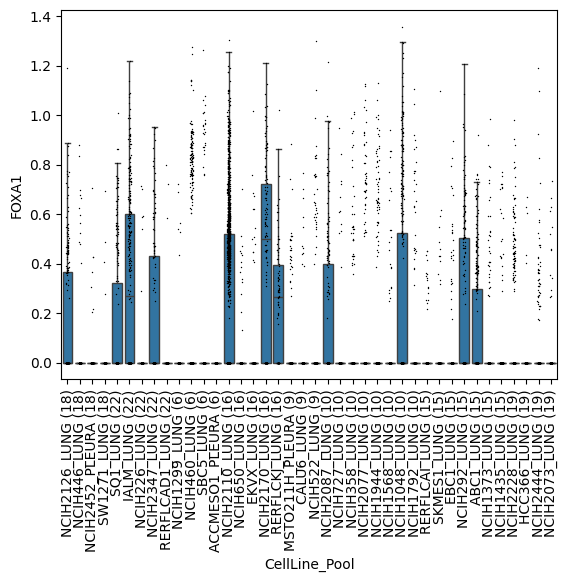

In [30]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
df['Pool']=adata_lung.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='FOXA1', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='FOXA1', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

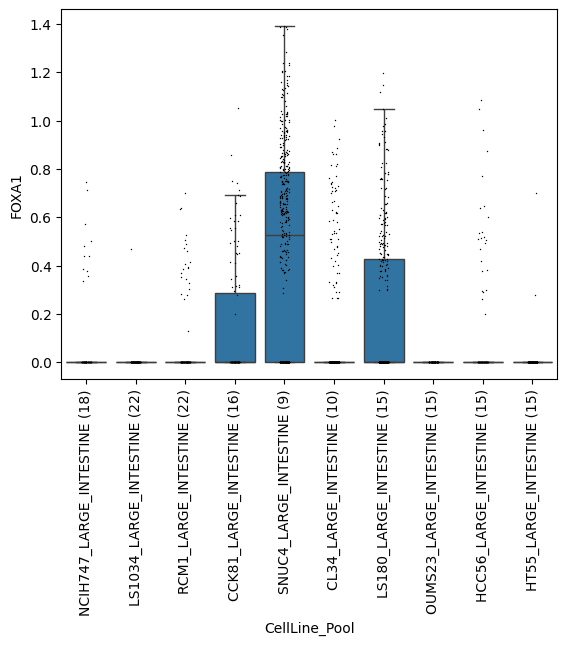

In [16]:
adata_Colorectal = adata[adata.obs.Indication=='Colon/Colorectal Cancer'].copy()
df = sc.get.obs_df(adata_Colorectal, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_Colorectal.obs['CellLine']
df['Pool']=adata_Colorectal.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='FOXA1', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='FOXA1', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

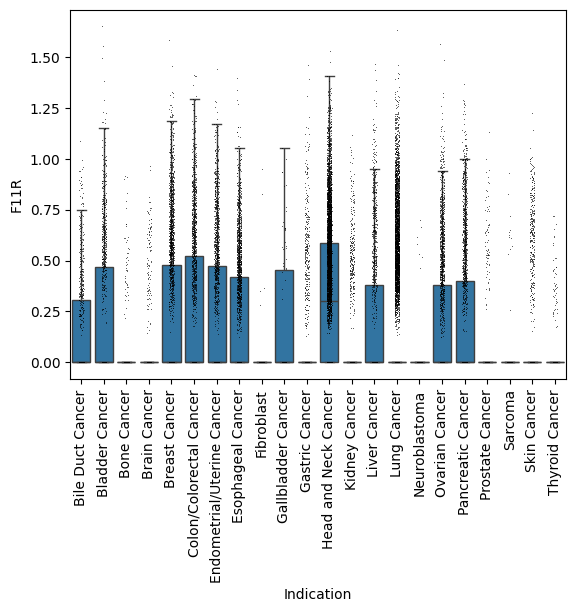

In [37]:
df = sc.get.obs_df(adata, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='F11R', showfliers=False)
sns.stripplot(data=df, x='Indication', y='F11R', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)
plt.show()

### F11R (JAM-A) overexpression upregulates HER2 protein expression in HER2-negative cell lines 
- Cruz RGB, Madden SF, Brennan K, Hopkins AM. A Transcriptional Link between HER2, JAM-A and FOXA1 in Breast Cancer. Cells. 2022 Feb 19;11(4):735. doi: 10.3390/cells11040735. PMID: 35203384; PMCID: PMC8870165.

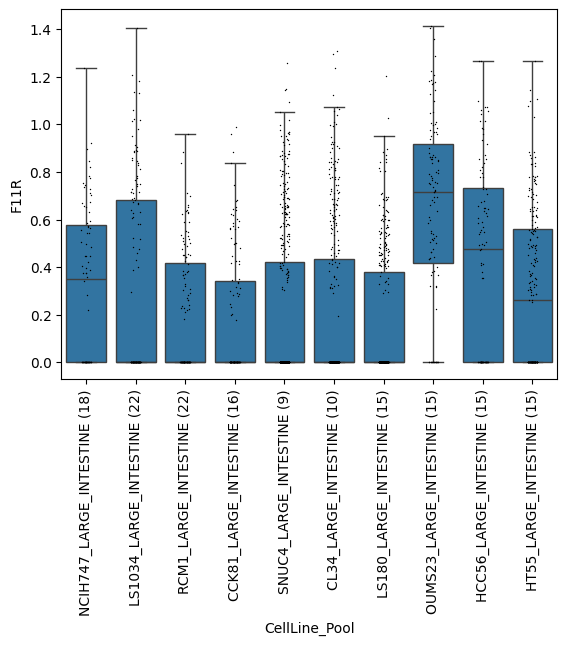

In [39]:
adata_Colorectal = adata[adata.obs.Indication=='Colon/Colorectal Cancer'].copy()
df = sc.get.obs_df(adata_Colorectal, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_Colorectal.obs['CellLine']
df['Pool']=adata_Colorectal.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='F11R', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='F11R', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

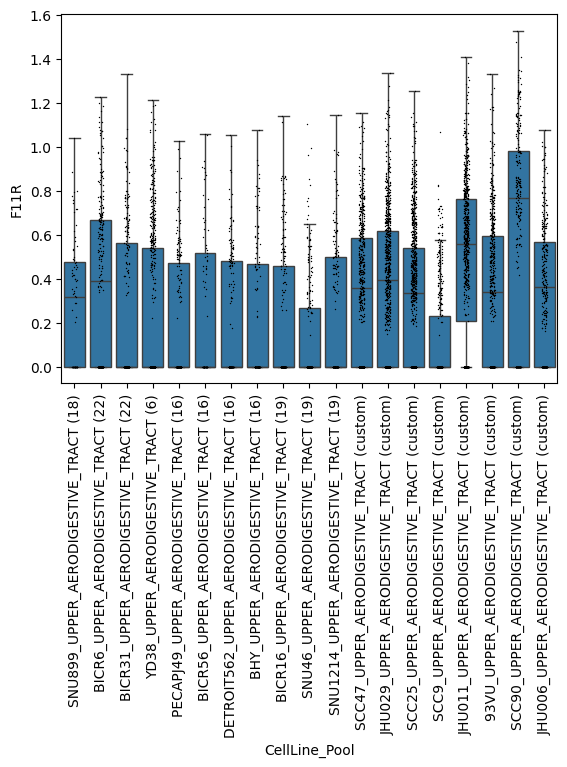

In [41]:
adata_hcc = adata[adata.obs.Indication=='Head and Neck Cancer'].copy()
df = sc.get.obs_df(adata_hcc, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_hcc.obs['CellLine']
df['Pool']=adata_hcc.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='F11R', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='F11R', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

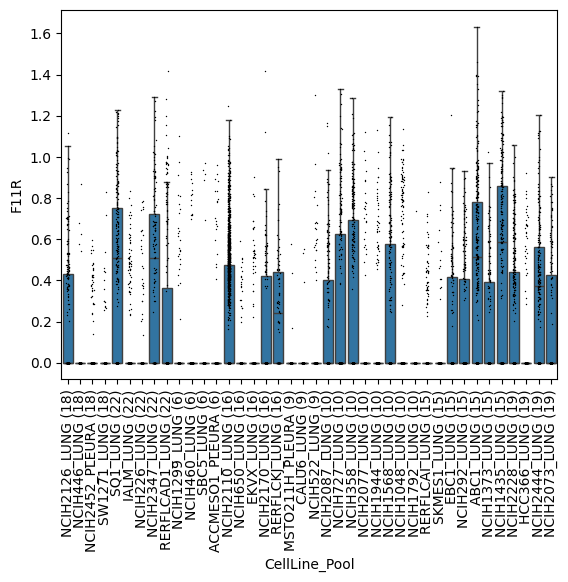

In [42]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
df['Pool']=adata_lung.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='F11R', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='F11R', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

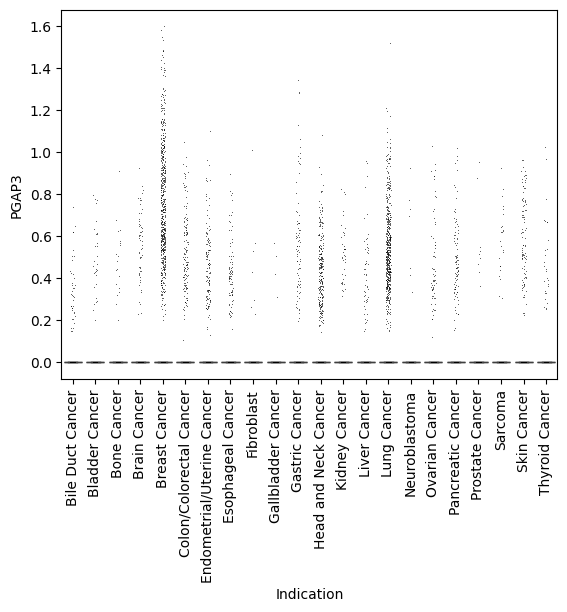

In [38]:
df = sc.get.obs_df(adata, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='PGAP3', showfliers=False)
sns.stripplot(data=df, x='Indication', y='PGAP3', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)
plt.show()

### PGAP3 is a co-expressed gene with ERBB2 
- Kenn, M., Castillo-Tong, D. C., Singer, C. F., Cibena, M., Kölbl, H., & Schreiner, W. (2018). Co-expressed genes enhance precision of receptor status identification in breast cancer patients. Breast Cancer Research and Treatment, 172(2), 313–326. https://doi.org/10.1007/s10549-018-4920-x

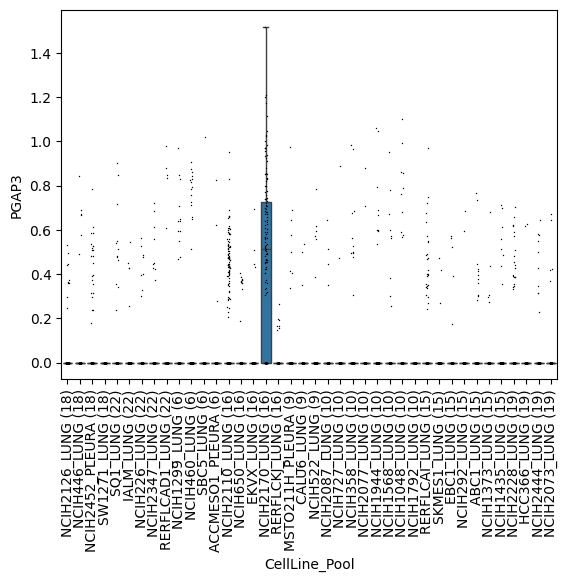

In [43]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
df['Pool']=adata_lung.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='PGAP3', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='PGAP3', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

### PGAP3 is highely co expressed in cell line NCIH2170 lung cancer with ERBB2 
### which indicate that trastumuzab could be reporpused for lung cancer 

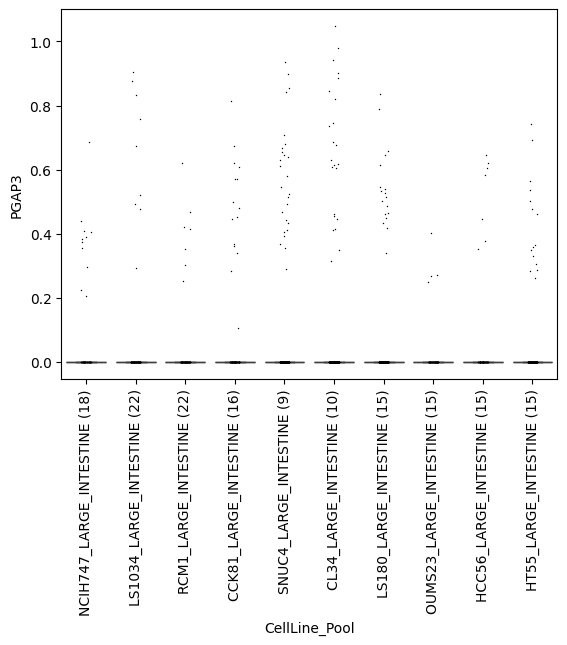

In [44]:
adata_Colorectal = adata[adata.obs.Indication=='Colon/Colorectal Cancer'].copy()
df = sc.get.obs_df(adata_Colorectal, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_Colorectal.obs['CellLine']
df['Pool']=adata_Colorectal.obs['Pool']
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='PGAP3', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='PGAP3', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

#### FOXA1 gene is associated with regulation of ERBB2 gene, foxa1 was highely expressed in lung cancer and some cell lines of colorectal cancer indicating presence of HER2 
#### F11T is also associated with regulation of ERBB2 gene, its highely expressed in lung, colorectal and head and neck cancer 
#### PGAP3 is a co-expression gene with ERBB2, its presence indicate HER2 expression in lung and colorectal cancer  



# reactome pathway analysis
## exploraing pathways stimulated by presence of HER2

In [11]:
msigdb = dc.get_resource('MSigDB')
msigdb

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [12]:
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [13]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='reactome_pathways']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]


In [15]:
dc.run_ora(
    mat=adata,
    net=msigdb,
    source='geneset',
    target='genesymbol',
    verbose=True,
    use_raw=False
)

In [ ]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts

In [ ]:
msigdb

In [34]:
for i in range(len(msigdb.geneset)):
    if 'ERBB2' in msigdb.genesymbol.iloc[i] :
        print(msigdb.geneset.iloc[i])

REACTOME_SIGNALING_BY_ERBB2_ECD_MUTANTS
REACTOME_RNA_POLYMERASE_II_TRANSCRIPTION
REACTOME_GRB7_EVENTS_IN_ERBB2_SIGNALING
REACTOME_ERBB2_REGULATES_CELL_MOTILITY
REACTOME_GRB2_EVENTS_IN_ERBB2_SIGNALING
REACTOME_PI3K_EVENTS_IN_ERBB2_SIGNALING
REACTOME_CONSTITUTIVE_SIGNALING_BY_OVEREXPRESSED_ERBB2
REACTOME_SEMA4D_IN_SEMAPHORIN_SIGNALING
REACTOME_SIGNALING_BY_PTK6
REACTOME_DEVELOPMENTAL_BIOLOGY
REACTOME_SHC1_EVENTS_IN_ERBB2_SIGNALING
REACTOME_INTRACELLULAR_SIGNALING_BY_SECOND_MESSENGERS
REACTOME_DISEASES_OF_SIGNAL_TRANSDUCTION_BY_GROWTH_FACTOR_RECEPTORS_AND_SECOND_MESSENGERS
REACTOME_ERBB2_ACTIVATES_PTK6_SIGNALING
REACTOME_PI3K_AKT_SIGNALING_IN_CANCER
REACTOME_SIGNALING_BY_ERBB2_IN_CANCER
REACTOME_DOWNREGULATION_OF_ERBB2_ERBB3_SIGNALING
REACTOME_SIGNALING_BY_ERBB2
REACTOME_SIGNALING_BY_RECEPTOR_TYROSINE_KINASES
REACTOME_NEGATIVE_REGULATION_OF_THE_PI3K_AKT_NETWORK
REACTOME_TFAP2_AP_2_FAMILY_REGULATES_TRANSCRIPTION_OF_GROWTH_FACTORS_AND_THEIR_RECEPTORS
REACTOME_SEMA4D_INDUCED_CELL_MIGRATION_A

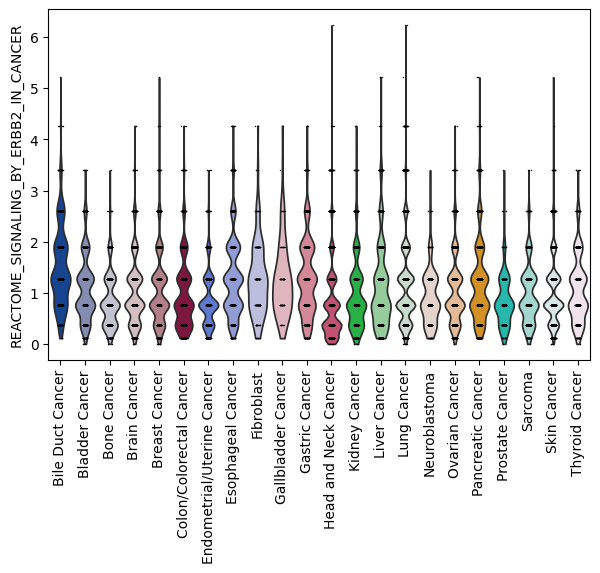

In [56]:
sc.pl.violin(acts, keys=['REACTOME_SIGNALING_BY_ERBB2_IN_CANCER'], groupby='Indication', rotation=90)

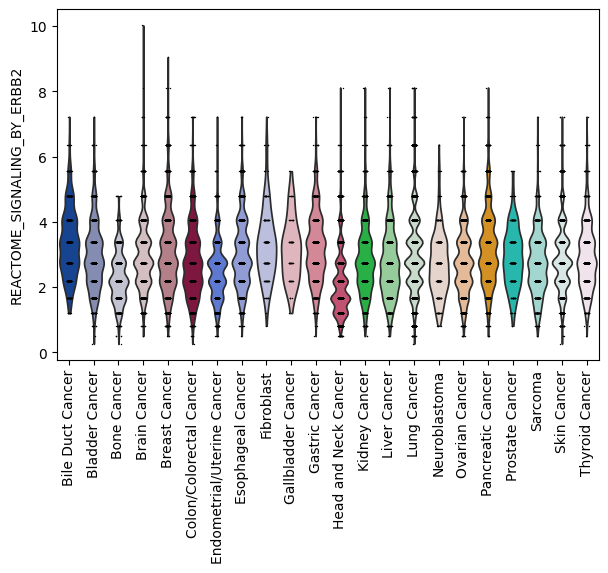

In [55]:
sc.pl.violin(acts, keys=['REACTOME_SIGNALING_BY_ERBB2'], groupby='Indication', rotation=90)

In [ ]:
adata_brain = adata[adata.obs.Indication=='Brain'].copy()
df = sc.get.obs_df(adata_brain, keys=['ERBB2', 'FOXA1', 'F11R','PGAP3'], layer='log2_counts')
df['CellLine'] = adata_brain.obs['CellLine']
df['Pool']=adata_brain.obs['Pool']
df['REACTOME_SIGNALING_BY_ERBB2']= adataadata_brain
df['CellLine_Pool'] = df['CellLine'].astype(str) + ' (' + df['Pool'].astype(str) + ')'
sns.boxplot(data=df, x='CellLine_Pool', y='PGAP3', showfliers=False)
sns.stripplot(data=df, x='CellLine_Pool', y='PGAP3', color='black', size=1, jitter=True)
plt.xticks(rotation=90)
plt.show()

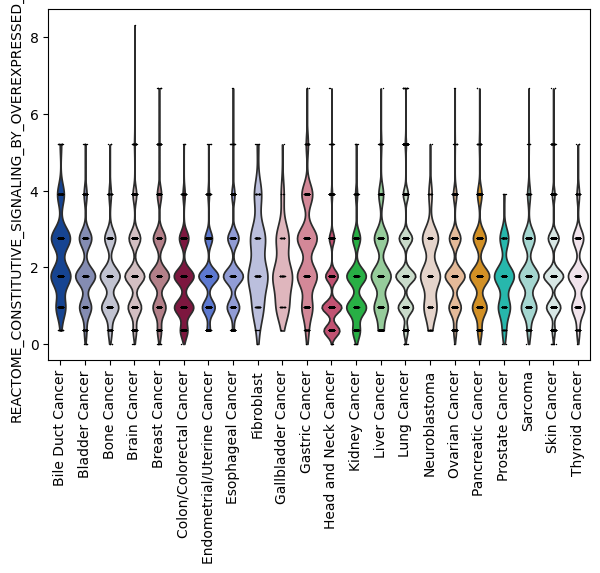

In [59]:
sc.pl.violin(acts, keys=['REACTOME_CONSTITUTIVE_SIGNALING_BY_OVEREXPRESSED_ERBB2'], groupby='Indication', rotation=90)

### lung, head and neck and colorectal cancer show ERBB2 signlaing indicating the possiblity of her2 presence
### brain cancer show high ERBB2 signlaing but need more validation

# investigation of trastumuzab resistance
## to test if our conclusion is affected by any biological state

### insulin-like growth factor-I, vascular endothelial growth factor, and transforming growth factor beta are associated with trastumuzab resistance 

### these receptors can activate the same downstream pathways as HER2, promoting cancer cell survival and growth despite trastuzumab treatment.
- Nahta, R. (2012). Pharmacological strategies to overcome HER2 Cross-Talk and trastuzumab resistance. Current Medicinal Chemistry, 19(7), 1065–1075. https://doi.org/10.2174/092986712799320691

In [69]:
for i in adata.var_names:
    if 'TGF' in i :
        print(i)

CTGF
PTGFR
PTGFRN
TGFA
TGFB1
TGFB1I1
TGFB2
TGFB3
TGFBI
TGFBR1
TGFBR2
TGFBR3
TGFBR3L
TGFBRAP1


In [ ]:
IGF1  VEGF TGF-beta

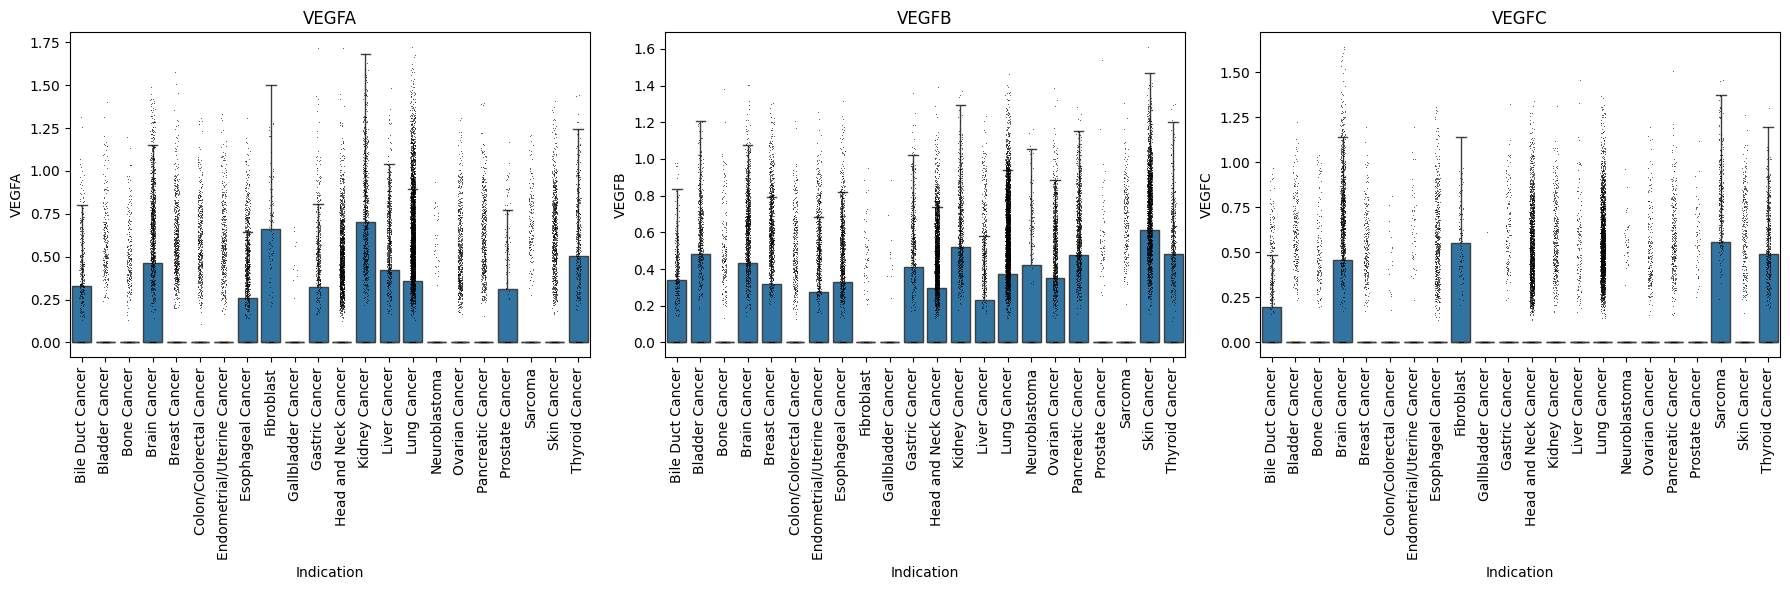

In [67]:
# Extract the data once for all plots
df = sc.get.obs_df(adata, keys=['IGF1', 'VEGFA','VEGFB','VEGFC'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']

# Create a 1x3 subplot for the three genes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot VEGFA
sns.boxplot(data=df, x='Indication', y='VEGFA', showfliers=False, ax=axes[0])
sns.stripplot(data=df, x='Indication', y='VEGFA', color='black', size=0.5, jitter=True, ax=axes[0])
axes[0].set_title('VEGFA')
axes[0].tick_params(axis='x', rotation=90)

# Plot VEGFB
sns.boxplot(data=df, x='Indication', y='VEGFB', showfliers=False, ax=axes[1])
sns.stripplot(data=df, x='Indication', y='VEGFB', color='black', size=0.5, jitter=True, ax=axes[1])
axes[1].set_title('VEGFB')
axes[1].tick_params(axis='x', rotation=90)

# Plot VEGFC
sns.boxplot(data=df, x='Indication', y='VEGFC', showfliers=False, ax=axes[2])
sns.stripplot(data=df, x='Indication', y='VEGFC', color='black', size=0.5, jitter=True, ax=axes[2])
axes[2].set_title('VEGFC')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

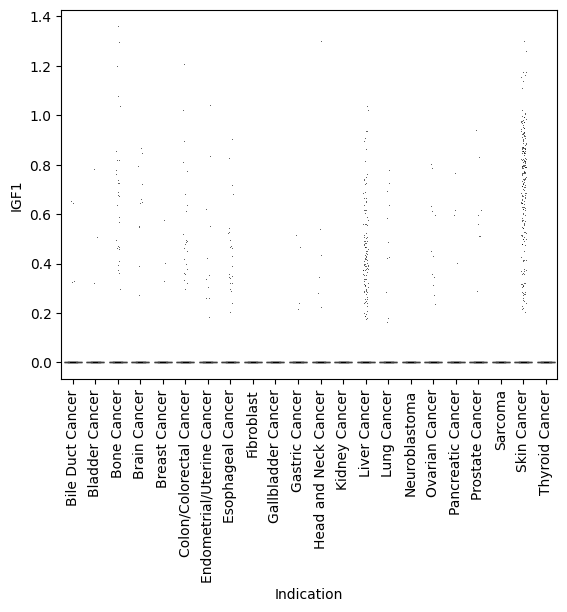

In [68]:
df = sc.get.obs_df(adata, keys=['IGF1', 'VEGFA','VEGFB','VEGFC'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='IGF1', showfliers=False)
sns.stripplot(data=df, x='Indication', y='IGF1', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)
plt.show()

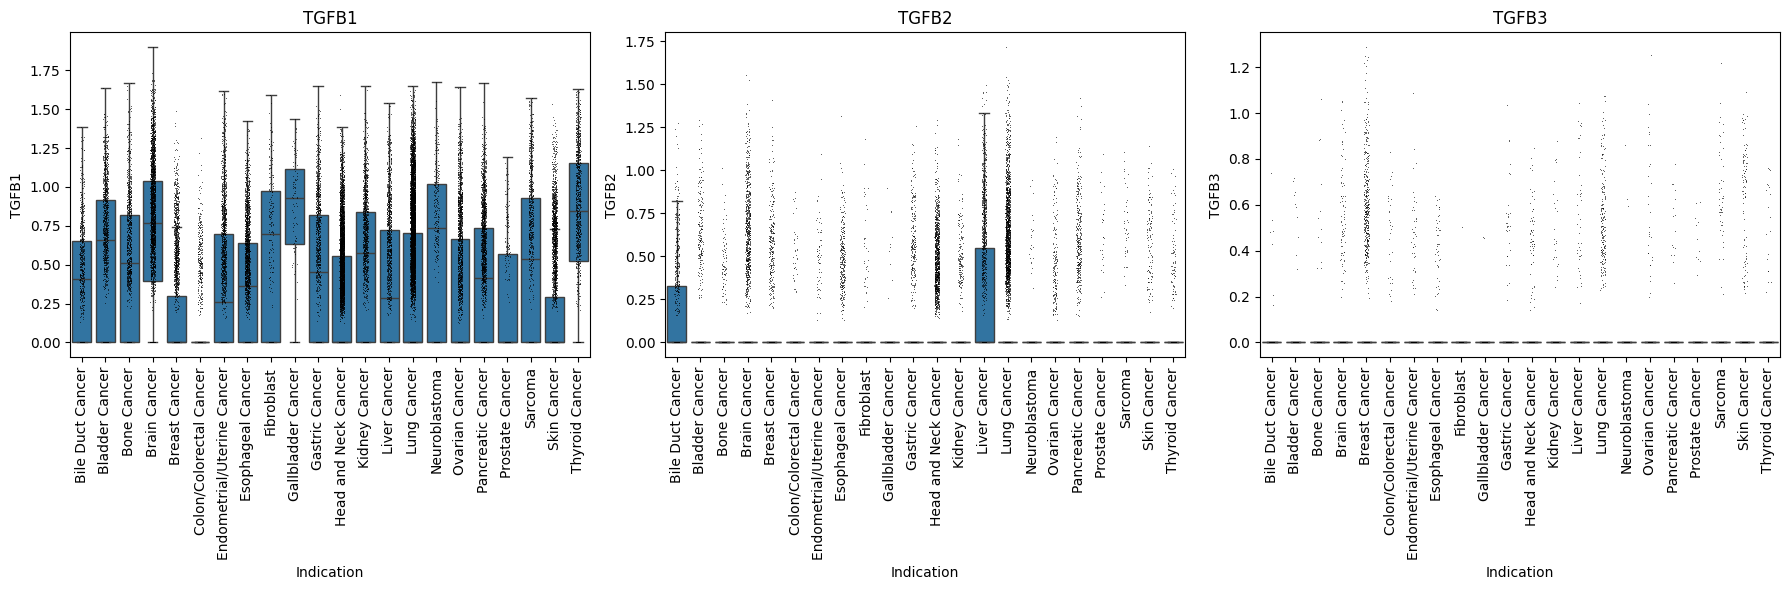

In [70]:
# Extract the data once for all plots
df = sc.get.obs_df(adata, keys=['TGFB1', 'TGFB2','TGFB3'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']

# Create a 1x3 subplot for the three genes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot VEGFA
sns.boxplot(data=df, x='Indication', y='TGFB1', showfliers=False, ax=axes[0])
sns.stripplot(data=df, x='Indication', y='TGFB1', color='black', size=0.5, jitter=True, ax=axes[0])
axes[0].set_title('TGFB1')
axes[0].tick_params(axis='x', rotation=90)

# Plot VEGFB
sns.boxplot(data=df, x='Indication', y='TGFB2', showfliers=False, ax=axes[1])
sns.stripplot(data=df, x='Indication', y='TGFB2', color='black', size=0.5, jitter=True, ax=axes[1])
axes[1].set_title('TGFB2')
axes[1].tick_params(axis='x', rotation=90)

# Plot VEGFC
sns.boxplot(data=df, x='Indication', y='TGFB3', showfliers=False, ax=axes[2])
sns.stripplot(data=df, x='Indication', y='TGFB3', color='black', size=0.5, jitter=True, ax=axes[2])
axes[2].set_title('TGFB3')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

### lung and head and neck cancers show high expression of genes associated with the same pathway of her2, which could lead to a resistance to trastumuzab and cancer survival 

---------------------------------------------------------

# summary 


**ERBB2** (HER2) is highly expressed in **breast** and **gastric cancers**, as it's FDA approved of **trastuzumab** for these indications, ERBB2 is also highely expresed in **lung cancer**, likely due to **intra-tumoral heterogeneity**.

Key findings include:
- **FOXA1** transcription factor which upregulates **ERBB2** and is high in **lung** and **colorectal cancers**.
- **PGAP3** co-expression with **ERBB2** in **lung cancer** (NCI-H2170) suggests trastuzumab may be viable for **lung cancer**.
- **ERBB2 signaling** in **lung, head and neck, colorectal, and brain cancers** points to the presence of HER2.

Resistance to trastuzumab may arise from presence of **IGF-I, VEGF, and TGF-β** signaling, observed in **lung and head and neck cancers**, suggesting the need for combination therapies.]
## in conclusion 
### Trastuzumab could be repurposed for colorectal, head and neck, and lung cancers; however, it's important to note that lung and head and neck cancers may have potential resistance to trastuzumab.
### brain cancer need more investigation to decide its re-porpusing